## ProPPA application to Lotka Volterra

In [43]:
## Set ProPPA path (need to reformat package into installable version)
import sys
sys.path.append("../../ProPPA")

import proppa
import numpy as np
import scipy.stats as spst
import matplotlib.pyplot as plt
import tellurium as te
import pickle

import pandas as pd

### Run inference on LV with existing Proppa model and data

#### Load model

In [15]:
lv_path = "../../ProPPA/models/predPrey.proppa"
lv_model = proppa.load_model(lv_path)

In [26]:
lv_model

#### Inference

In [27]:
n_samples = 100000  # how many samples to take from the posterior

samples = lv_model.infer(n_samples)
samples = np.array(samples)

Will take 100000 samples...
Taken 500 samples
Taken 1000 samples
Taken 1500 samples
Taken 2000 samples
Taken 2500 samples
Taken 3000 samples
Taken 3500 samples
Taken 4000 samples
Taken 4500 samples
Taken 5000 samples
Taken 5500 samples
Taken 6000 samples
Taken 6500 samples
Taken 7000 samples
Taken 7500 samples
Taken 8000 samples
Taken 8500 samples
Taken 9000 samples
Taken 9500 samples
Taken 10000 samples
Taken 10500 samples
Taken 11000 samples
Taken 11500 samples
Taken 12000 samples
Taken 12500 samples
Taken 13000 samples
Taken 13500 samples
Taken 14000 samples
Taken 14500 samples
Taken 15000 samples
Taken 15500 samples
Taken 16000 samples
Taken 16500 samples
Taken 17000 samples
Taken 17500 samples
Taken 18000 samples
Taken 18500 samples
Taken 19000 samples
Taken 19500 samples
Taken 20000 samples
Taken 20500 samples
Taken 21000 samples
Taken 21500 samples
Taken 22000 samples
Taken 22500 samples
Taken 23000 samples
Taken 23500 samples
Taken 24000 samples
Taken 24500 samples
Taken 25000 

Text(0.5, 1.0, 'Rate d')

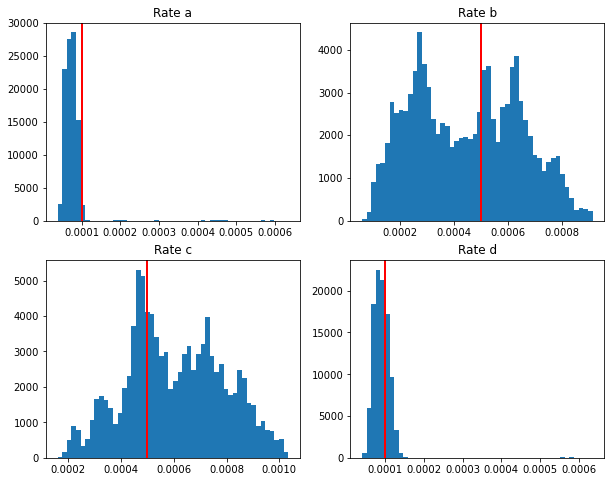

In [31]:
fig, ax = plt.subplots(2,2, figsize = (10,8))

## Inference Results
ax[0,0].hist(samples[:, 0], bins = 50)
ax[0,1].hist(samples[:, 1], bins = 50)
ax[1,0].hist(samples[:, 2], bins = 50)
ax[1,1].hist(samples[:, 3], bins = 50)

## Overlay true rates
true_rates = [ 0.0001, 0.0005, 0.0005,  0.0001]

ax[0,0].axvline(true_rates[0], color = "red", linewidth=2)
ax[0,1].axvline(true_rates[1], color = "red", linewidth=2)
ax[1,0].axvline(true_rates[2], color = "red", linewidth=2)
ax[1,1].axvline(true_rates[3], color = "red", linewidth=2)

ax[0,0].set_title("Rate a")
ax[0,1].set_title("Rate b")
ax[1,0].set_title("Rate c")
ax[1,1].set_title("Rate d")

### Run with new model and data (generated with Pyro implementation)

In [50]:
lv_path = "../data/Proppa_Models/LotkaVolterra.proppa"
lv_model = proppa.load_model(lv_path)

In [51]:
n_samples = 100000  # how many samples to take from the posterior

samples = lv_model.infer(n_samples)
samples = np.array(samples)

Will take 100000 samples...
Taken 500 samples
Taken 1000 samples
Taken 1500 samples
Taken 2000 samples
Taken 2500 samples
Taken 3000 samples
Taken 3500 samples
Taken 4000 samples
Taken 4500 samples
Taken 5000 samples
Taken 5500 samples
Taken 6000 samples
Taken 6500 samples
Taken 7000 samples
Taken 7500 samples
Taken 8000 samples
Taken 8500 samples
Taken 9000 samples
Taken 9500 samples
Taken 10000 samples
Taken 10500 samples
Taken 11000 samples
Taken 11500 samples
Taken 12000 samples
Taken 12500 samples
Taken 13000 samples
Taken 13500 samples
Taken 14000 samples
Taken 14500 samples
Taken 15000 samples
Taken 15500 samples
Taken 16000 samples
Taken 16500 samples
Taken 17000 samples
Taken 17500 samples
Taken 18000 samples
Taken 18500 samples
Taken 19000 samples
Taken 19500 samples
Taken 20000 samples
Taken 20500 samples
Taken 21000 samples
Taken 21500 samples
Taken 22000 samples
Taken 22500 samples
Taken 23000 samples
Taken 23500 samples
Taken 24000 samples
Taken 24500 samples
Taken 25000 

Text(0.5, 1.0, 'Rate c')

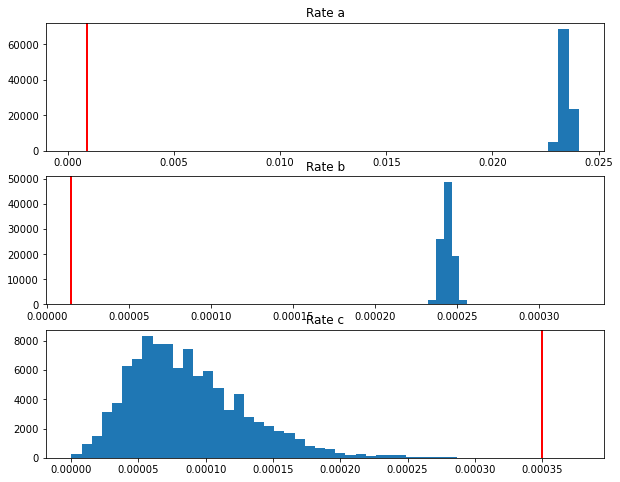

In [52]:
fig, ax = plt.subplots(3,1, figsize = (10,8))

## Inference Results
ax[0].hist(samples[:, 0], bins = 50)
ax[1].hist(samples[:, 1], bins = 50)
ax[2].hist(samples[:, 2], bins = 50)

## Overlay true rates
true_rates = [ 0.0009, 0.000015, 0.00035]

ax[0].axvline(true_rates[0], color = "red", linewidth=2)
ax[1].axvline(true_rates[1], color = "red", linewidth=2)
ax[2].axvline(true_rates[2], color = "red", linewidth=2)

ax[0].set_title("Rate a")
ax[1].set_title("Rate b")
ax[2].set_title("Rate c")

### Lac Operon

#### Get info needed to build proppa model

In [72]:
## Use Tellurium to print model deets
ant_lo = te.sbmlToAntimony(r"..\data\LacOperon\LacOperon_stochastic.xml")
model_lo = te.loadSBMLModel(r"..\data\LacOperon\LacOperon_stochastic.xml")

In [73]:
print(ant_lo)

// Created by libAntimony v2.12.0
model *biocrnpyler_24259()

  // Compartments and Species:
  compartment default;
  species rna_M in default, monomer_betaGal in default, protein_betaGal in default;
  species Lactose_external in default, Lactose_internal in default, Glucose_external in default;
  species Glucose_internal in default, protein_Lactose_Permease in default;
  species dna_Lac_Operon in default, Biomass in default, Lactose_consumed in default;

  // Reactions:
  r0: dna_Lac_Operon => dna_Lac_Operon + rna_M; dna_Lac_Operon*r0_Vtx*(r0_k_leak + (Lactose_internal^r0_n_L/(r0_K_L^r0_n_L + Lactose_internal^r0_n_L))*(1/(1 + (Glucose_external/r0_K_G)^r0_n_G)));
  r1: rna_M => rna_M + monomer_betaGal; k_tl_beta_Gal__*rna_M;
  r2: rna_M => rna_M + protein_Lactose_Permease; k_tl_lacP__*rna_M;
  r3: 4 monomer_betaGal => protein_betaGal; BGal_tetramerization__*monomer_betaGal*(monomer_betaGal - 1)*(monomer_betaGal - 2)*(monomer_betaGal - 3);
  r4: Lactose_internal => Lactose_consumed; BGa

In [74]:
## Transistion matrix
model_lo.getFullStoichiometryMatrix()

                            r0, r1, r2, r3, r4, r5, r6, r7, r8, r9, r10
rna_M                    [[  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,   0],
monomer_betaGal           [  0,  1,  0, -4,  0,  0,  0,  0,  0,  0,   0],
protein_betaGal           [  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,   0],
Lactose_external          [  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,   0],
Lactose_internal          [  0,  0,  0,  0, -1,  0,  1, -1,  0,  0,   0],
Glucose_external          [  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,   0],
Glucose_internal          [  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,   0],
protein_Lactose_Permease  [  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  -1],
dna_Lac_Operon            [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,   0],
Biomass                   [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,   0],
Lactose_consumed          [  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,   0]]

In [61]:
## Load (Vivarium) simulated LO data and sample for proppa inference
with open(r"..\data\LacOperon\sim_data.pickle", "rb") as input_file:
    lo_data = pickle.load(input_file)
lo_data_sample = lo_data[0]

## Proppa requires time to be first col
lo_data_sample.loc[[x for x in range(len(lo_data_sample)) if x%100 == 0], [
    'time', 'rna_M', 'monomer_betaGal', 'protein_betaGal', 'Lactose_external', 
    'Lactose_internal', 'Glucose_external', 'Glucose_internal', 'protein_Lactose_Permease', 
    'dna_Lac_Operon', 'Biomass', 'Lactose_consumed']].to_csv("../data/lo_proppa_obs", sep = " ", index = False)

#### Create Model and Run Inference

In [89]:
lo_path = "../data/Proppa_Models/LacOperon.proppa"
lo_model = proppa.load_model(lo_path)

In [90]:
n_samples = 10000  # how many samples to take from the posterior

samples = lo_model.infer(n_samples)
samples = np.array(samples)

Will take 10000 samples...
Taken 500 samples
Taken 1000 samples
Taken 1500 samples
Taken 2000 samples
Taken 2500 samples
Taken 3000 samples
Taken 3500 samples
Taken 4000 samples
Taken 4500 samples


/mnt/d/northeastern/research/causal_inference/biosim_project/gillespiePPL/Jupyter_Notebooks/../../ProPPA/fluid_sampler.py:68: RuntimeWarning:

invalid value encountered in subtract



Taken 5000 samples
Taken 5500 samples
Taken 6000 samples
Taken 6500 samples
Taken 7000 samples
Taken 7500 samples
Taken 8000 samples
Taken 8500 samples
Taken 9000 samples
Taken 9500 samples
Taken 10000 samples
Sampling finished (10000 samples).
Mean:     [6.16515202e-01 9.24345580e-01 8.52568200e+02 1.34690040e+02
 7.27626485e+04 2.96501583e+02 8.09642939e+03 8.28652350e-01
 8.57978783e+06 1.43633217e-01 3.48343414e-01 8.44568858e-01
 2.33471294e+00 2.89156226e+06 1.57508869e+03 1.70363015e+00
 9.50406682e-01 9.38300389e+03 3.85204407e+01 1.50005944e+05
 4.84394695e-01]
Variance: [1.19200739e-01 4.03734480e-03 8.30162020e+04 1.95165823e+04
 1.18339241e+08 9.33509458e+03 1.90789746e+06 2.89731153e-01
 5.17077083e+10 5.27104070e-03 2.13805599e-07 9.62085424e-05
 8.29729243e-01 3.16579927e+09 6.14581529e+04 5.95737764e-01
 2.37090866e-03 3.46478588e+05 3.79333627e+00 8.16973218e+08
 3.12911814e-02]


In [94]:
samples[:, 20]

array([0.42679055, 0.42679055, 0.44788776, ..., 0.54517332, 0.54517332,
       0.54517332])

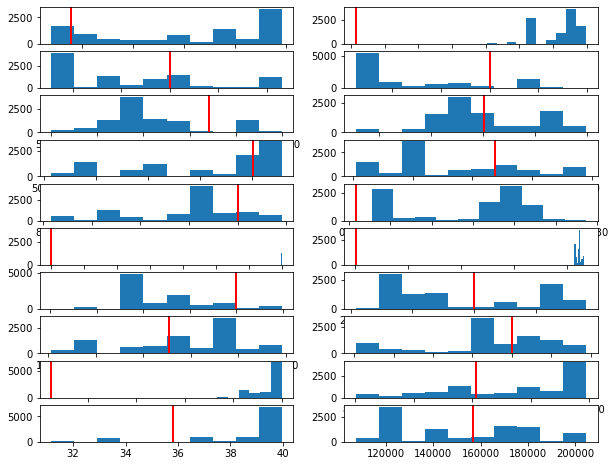

In [98]:
fig, ax = plt.subplots(10,2, figsize = (10,8))

## True rates
true_rates = [0.156666666666667, 0.313333333333333, 1000, 300, 84310, 301, 
              9033, 1.18966666666667, 8800000, 0.00783333333333333, 
              0.000166666666666667, 0.003, 4, 2900000, 1506, 2, 0.05, 
              9033, 35.8, 156576, 0.35]

## Inference Results
group = 0
for i in range(10):
    ax[i,0].hist(samples[:, group], bins = 10)
    ax[i,1].hist(samples[:, group+1], bins = 10)
    
    ax[i,0].axvline(true_rates[group], color = "red", linewidth=2)
    ax[i,1].axvline(true_rates[group+1], color = "red", linewidth=2)
    
    group += 2

# ax[0].set_title("Rate a")
# ax[1].set_title("Rate b")
# ax[2].set_title("Rate c")